In [125]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [126]:
# Read the Mouse and Drug Data and the Clinical Trial Data

df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [127]:
df_clinics = pd.read_csv(clinical_trial_data_to_load)
df_clinics.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [128]:
# Combine the data into a single dataset
df_data = pd.merge(df_mouse, df_clinics, on='Mouse ID')
df_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [129]:
# df_mouse is short
df_mouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [130]:
# df_clinics is longer, but just repeating the unique Mouse IDs from df_mouse
df_clinics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


In [131]:
# why is df_data longer than df_clinics? 
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Drug                  1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


In [132]:
# unlucky mouse g989 was experimented on twice!
df_mouse['Mouse ID'].value_counts()

g989    2
e213    1
n763    1
x822    1
z435    1
a262    1
f234    1
v339    1
v289    1
j119    1
c458    1
m957    1
b313    1
r701    1
v719    1
j296    1
h333    1
p189    1
w584    1
i738    1
t573    1
g296    1
y449    1
u196    1
w746    1
f993    1
g867    1
v603    1
c927    1
o287    1
       ..
e227    1
z581    1
j989    1
g107    1
i177    1
x401    1
u946    1
v199    1
v835    1
x209    1
p136    1
o562    1
a401    1
l509    1
t994    1
k210    1
j365    1
m269    1
g558    1
k483    1
i901    1
g570    1
s337    1
e291    1
y163    1
c402    1
q610    1
p310    1
u327    1
s185    1
Name: Mouse ID, Length: 249, dtype: int64

In [133]:
df_data['Mouse ID'].value_counts()

g989    26
e213    10
m546    10
q511    10
y769    10
r604    10
l725    10
k382    10
z969    10
b559    10
a699    10
z578    10
k894    10
y793    10
y478    10
l897    10
c282    10
p438    10
e662    10
z795    10
b128    10
m601    10
a262    10
k862    10
u327    10
z581    10
j755    10
a203    10
l733    10
c139    10
        ..
d164     3
l264     3
z435     3
w746     2
o813     2
w140     2
f394     2
c326     2
y601     2
w678     2
m756     2
s619     2
z234     2
v339     2
n630     2
z314     2
f278     2
h531     2
n482     1
l872     1
x336     1
u153     1
o848     1
v199     1
b447     1
f932     1
t573     1
h428     1
d133     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [134]:
df_clinics['Mouse ID'].value_counts()

g989    13
e213    10
k382    10
c302    10
p189    10
k894    10
b128    10
q511    10
y769    10
l725    10
t451    10
u364    10
z969    10
b559    10
i738    10
c282    10
a699    10
z578    10
y793    10
y478    10
g296    10
m601    10
e662    10
l733    10
s337    10
v991    10
y163    10
c402    10
u327    10
z581    10
        ..
i477     3
v989     3
s166     3
w746     2
c326     2
s619     2
f394     2
v339     2
o813     2
w140     2
z314     2
f278     2
y601     2
n630     2
m756     2
w678     2
h531     2
z234     2
u153     1
t573     1
x336     1
b447     1
x226     1
n482     1
d133     1
v199     1
o848     1
h428     1
l872     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

Merging the dataframes double counts g989s data, for a total of 26 data points. In actuality, the 13 data points represent 5 data points for one drug, and 8 for another. Without additional information, it's not possible to be absolutely certain which drug corresponds to which result, so all data related to mouse g989 should be removed.  

In [135]:
df_data = df_data[df_data['Mouse ID'] != 'g989']

In [136]:
df_data.count()

Mouse ID              1880
Drug                  1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [137]:
# Display the data table for preview

df_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [138]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_group_base = df_data.groupby(by=['Drug', 'Timepoint'])
df_group = df_group_base['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
df_group = df_group.reset_index()


# Preview DataFrame
df_group

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [139]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_group_std = df_group_base['Tumor Volume (mm3)'].std()

# Convert to DataFrame
df_group_std = df_group_std.reset_index()
df_group_std.rename(columns={"Drug":"Drug", "Timepoint":"Timepoint", "Tumor Volume (mm3)":"Tumor Volume (std)"}, inplace=True)

# Preview DataFrame
df_group_std


,Drug,Timepoint,Tumor Volume (std)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915
5,Capomulin,25,4.135268
6,Capomulin,30,4.383004
7,Capomulin,35,4.935447
8,Capomulin,40,5.607278
9,Capomulin,45,5.608969


In [145]:
# Minor Data Munging to Re-Format the Data Frames
df_pivot_means = df_group.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
df_pivot_means.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


In [146]:
df_pivot_errors = df_group_std.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (std)')
df_pivot_errors.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,1.175512,1.270025,0.970606,1.068422,1.159832,2.414777,1.222123,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.781250,3.528366,2.114737,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.944330,3.774331,2.442074,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.352495,3.770480,2.984408,2.198367


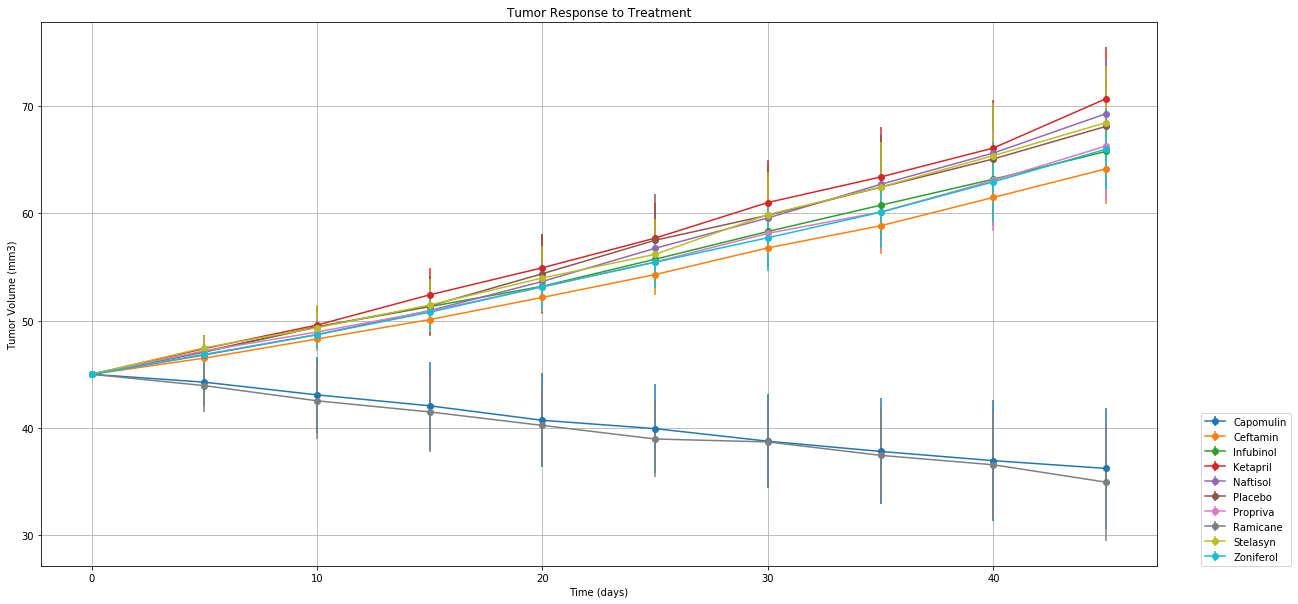

In [425]:
# Generate the Plot (with Error Bars)

# Create a list for all mean values, errors, and indices for errorbar chart
all_means = df_pivot_means.values.T.tolist()
all_errors = df_pivot_errors.values.T.tolist()
indices = df_pivot_means.index.values
labels = df_pivot_means.columns

# Plot the data
fig, ax = plt.subplots(figsize=(20,10))

for i in range(len(all_means)):
    plt.errorbar(indices, all_means[i], yerr=all_errors[i], fmt='-o', label=labels[i])
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.grid(True)
plt.legend(loc=(1.04,0))

# Save the Figure
plt.savefig('Tumor_Response.png')

## Metastatic Response to Treatment

In [261]:
df_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [266]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_group = df_data.groupby(by=['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
df_meta = meta_group.reset_index()

# Preview DataFrame
df_meta

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [268]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_errors = df_data.groupby(by=['Drug', 'Timepoint'])['Metastatic Sites'].std()

# Convert to DataFrame
df_meta_errors = meta_errors.reset_index()

# Preview DataFrame
df_meta_errors

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.374166
2,Capomulin,10,0.627163
3,Capomulin,15,0.646899
4,Capomulin,20,0.775107
5,Capomulin,25,0.852803
6,Capomulin,30,0.811177
7,Capomulin,35,0.795006
8,Capomulin,40,0.804748
9,Capomulin,45,0.928388


In [269]:
# Minor Data Munging to Re-Format the Data Frames
df_meta_pivot = df_meta.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
df_meta_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [270]:
# Minor Data Munging to Re-Format the Data Frames
df_errors_pivot = df_meta_errors.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
df_errors_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.374166,0.497613,0.458258,0.470472,0.448978,0.494535,0.486985,0.331662,0.448978,0.380693
10,0.627163,0.680557,0.730297,0.666125,0.749603,0.564660,0.497613,0.442326,0.601585,0.511766
15,0.646899,0.787327,0.889087,0.834210,0.727029,0.850696,0.560612,0.564660,0.749603,0.511766
20,0.775107,1.022620,1.050063,1.031662,0.812728,1.020263,0.755929,0.572768,0.970320,0.685994
25,0.852803,1.098127,1.127494,1.256562,0.785905,1.088037,0.767948,0.572768,0.985184,0.946485
30,0.811177,0.997914,0.939336,1.474179,1.032796,1.162919,0.984732,0.671262,1.003670,0.961150
35,0.795006,0.997249,0.778499,1.490164,1.279881,1.277446,1.224745,0.669043,0.990430,1.069045
40,0.804748,1.081818,0.994429,1.222799,1.245946,1.029857,1.301708,0.718185,1.083625,1.121714


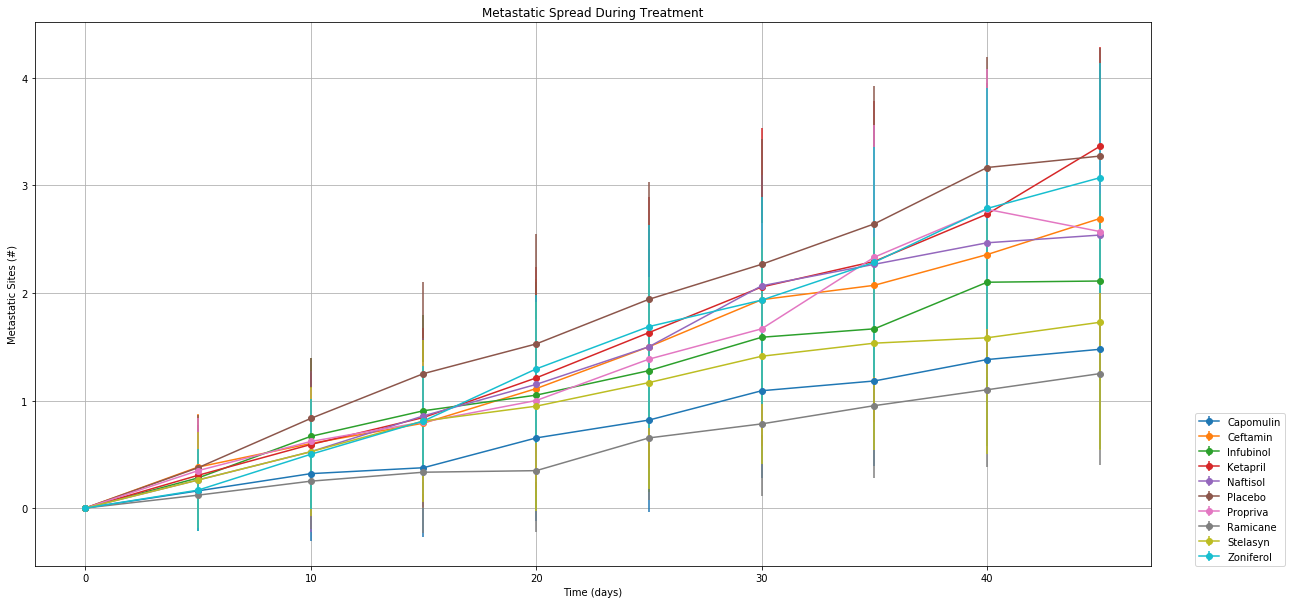

In [424]:
# Generate the Plot (with Error Bars)

# Create a list for all mean values, errors, and indices for errorbar chart
all_means = df_meta_pivot.values.T.tolist()
all_errors = df_errors_pivot.values.T.tolist()
indices = df_meta_pivot.index.values
labels = df_meta_pivot.columns

# Plot the data
fig, ax = plt.subplots(figsize=(20,10))

for i in range(len(all_means)):
    plt.errorbar(indices, all_means[i], yerr=all_errors[i], fmt='-o', label=labels[i])
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites (#)")
plt.title("Metastatic Spread During Treatment")
plt.grid(True)
plt.legend(loc=(1.04,0))

# Save the Figure
plt.savefig('Metastatic_Sites.png')

## Survival Rates

In [273]:
df_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [277]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
alive_group = df_data.groupby(by=['Drug', 'Timepoint'])['Tumor Volume (mm3)'].count()

# Convert to DataFrame
df_alive = alive_group.reset_index()
df_alive['Survival Rate'] = df_alive['Tumor Volume (mm3)']/25
df_alive.drop('Tumor Volume (mm3)', axis=1, inplace=True)

# Preview DataFrame
df_alive

,Drug,Timepoint,Survival Rate
0,Capomulin,0,1.00
1,Capomulin,5,1.00
2,Capomulin,10,1.00
3,Capomulin,15,0.96
4,Capomulin,20,0.92
5,Capomulin,25,0.88
6,Capomulin,30,0.88
7,Capomulin,35,0.88
8,Capomulin,40,0.84
9,Capomulin,45,0.84


In [278]:
# Minor Data Munging to Re-Format the Data Frames
df_alive_pivot = df_alive.pivot(index='Timepoint', columns='Drug', values='Survival Rate')

# Preview the Data Frame
df_alive_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.00,1.00,0.96,1.00,0.96,1.00
5,1.00,0.84,1.00,0.92,0.92,0.96,0.92,1.00,0.92,0.96
10,1.00,0.80,0.84,0.88,0.84,0.96,0.84,0.96,0.84,0.88
15,0.96,0.76,0.84,0.76,0.84,0.80,0.60,0.96,0.84,0.84
20,0.92,0.72,0.80,0.76,0.80,0.76,0.60,0.92,0.76,0.68
25,0.88,0.72,0.72,0.76,0.72,0.68,0.52,0.92,0.72,0.64
30,0.88,0.64,0.68,0.72,0.60,0.60,0.48,0.92,0.68,0.60
35,0.88,0.56,0.48,0.68,0.60,0.56,0.36,0.84,0.60,0.56
40,0.84,0.56,0.40,0.60,0.60,0.48,0.36,0.80,0.48,0.56


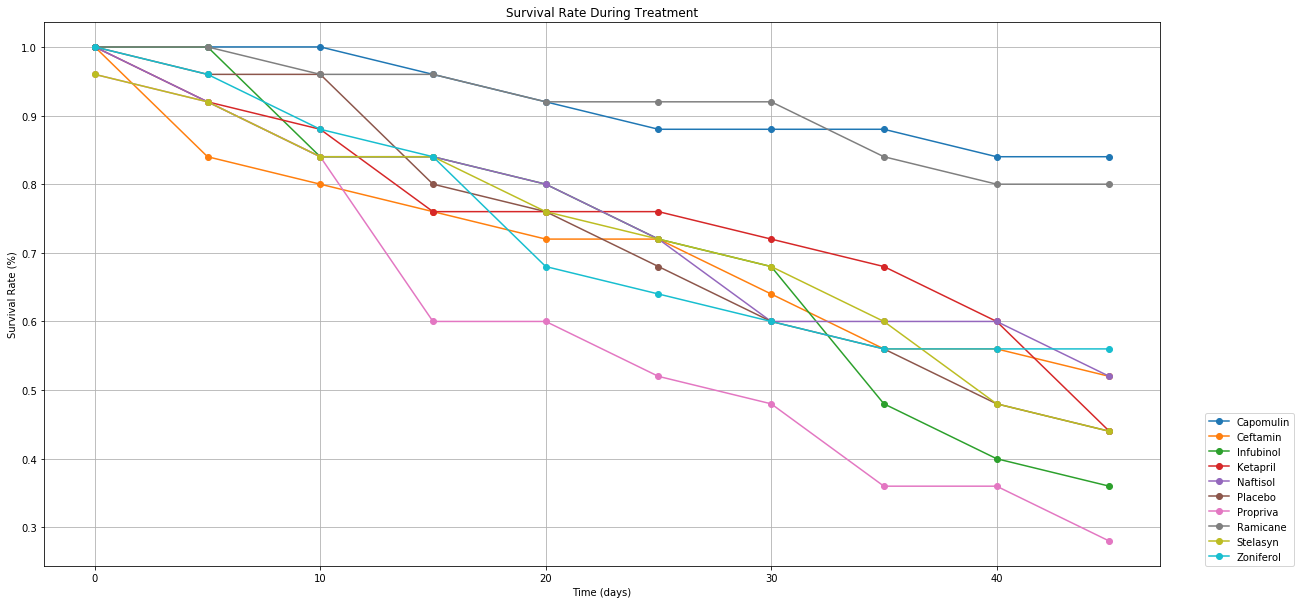

In [421]:
# Generate the Plot (Accounting for percentages)

# Create a list for all mean values, errors, and indices for errorbar chart
all_means = df_alive_pivot.values.T.tolist()
indices = df_alive_pivot.index.values
labels = df_alive_pivot.columns

# Plot the data
fig, ax = plt.subplots(figsize=(20,10))

for i in range(len(all_means)):
    ax.plot(indices, all_means[i], marker='o', label=labels[i])
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival Rate During Treatment")
ax.grid(True)
ax.legend(loc=(1.04,0))

# Save the Figure
plt.savefig('Survival Rates.png')

## Summary Bar Graph

In [282]:
df_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [321]:
# Calculate the percent changes for each drug

# Create grouped DataFrame
volume_group = df_data.groupby(by=['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
df_volume = volume_group.reset_index()

df_volume_pivot = df_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Isolate min and max values
starts = df_volume_pivot.iloc[0, :]
ends = df_volume_pivot.iloc[9, :]
percent_change = (ends - starts)/starts

# Display the data to confirm

In [317]:
starts

Drug
Capomulin    45.0
Ceftamin     45.0
Infubinol    45.0
Ketapril     45.0
Naftisol     45.0
Placebo      45.0
Propriva     45.0
Ramicane     45.0
Stelasyn     45.0
Zoniferol    45.0
Name: 0, dtype: float64

In [318]:
ends

Drug
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: 45, dtype: float64

In [324]:
percent_change

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64

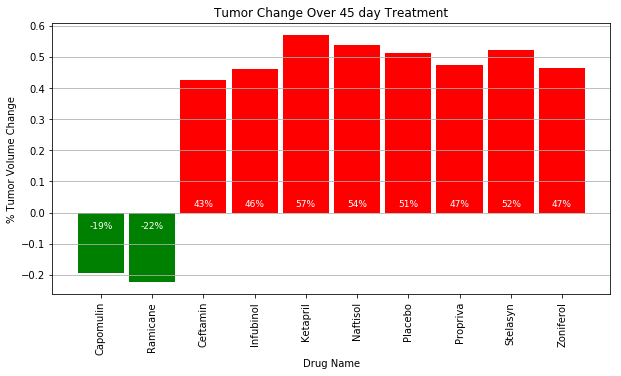

In [427]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs
pos = percent_change.loc[percent_change > 0]
pos_labels = pos.index.values.tolist()
pos_values = pos.values.tolist()

neg = percent_change.loc[percent_change <= 0]
neg_labels = neg.index.values.tolist()
neg_values = neg.values.tolist()


# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(neg_labels, neg_values, width=0.9, color='g')
ax.bar(pos_labels, pos_values, width=0.9, color='r')
ax.yaxis.grid(True)


# Labels
labels = neg_labels + pos_labels
values = neg_values + pos_values
x = [i for i in range(len(values))]
plt.xticks(x, labels, rotation='vertical')
plt.title('Tumor Change Over 45 day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.xlabel('Drug Name')

# Text overlay
percent_values = [f'{round(i*100)}%' for i in values]
text_loc = [-0.05 if i<0 else 0.02 for i in values]
for i in range(len(percent_values)):
    plt.text(x[i] , y = text_loc[i], s = percent_values[i], size = 9, ha='center', color='white')


# Save the Figure
plt.savefig('Rate of Change.png')



# Conclusions

1. Capomulin and Ramicane are clearly the best performing drugs, as they have the highest survival rates, the lowest rate of metastatic spread, are the only drugs that reduced tumor volume. 


2. The lowest performing results are less consistent: The largest rates of tumor growth were Ketapril (57%) and Naftisol (54%), both worse than the placebo (51%). Ketapril (3.36 sites)  had the largest increase in metastatic sites, larger even than the placebo (3.27 sites). And Propriva (28%) and Infubinol (36%) have the lowest survival rates (which is likely the most important metric unless we are including some measurement of quality of life), lower even than the placebo (44%). 


3. Regardign the errors, both Naftisol (1.27), and Stelasyn (1.19) had high errors rates for Metastatic Spread, whereas Capomulin (4.36) had by far the highest errors for the rate of tumor growth (the placebo had and standard error of 3.66). This is particularly troubling since Capomulin is one of the highest performing drugs, suggesting that it's performance may not be consistent enough to be preferred over Ramicane.